In [375]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data = pd.read_excel("result_data.xlsx",sheet_name="Sheet1")

In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

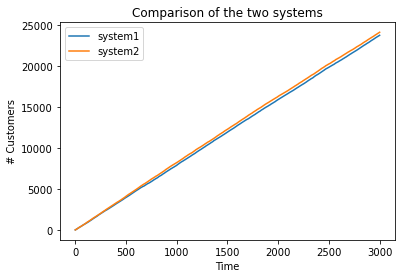

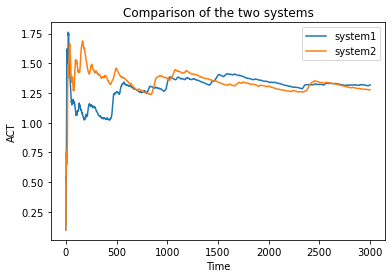

In [6]:
system_compare(aaa,bbb)

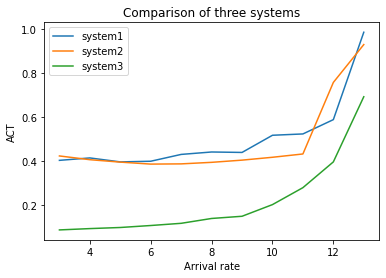

In [25]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

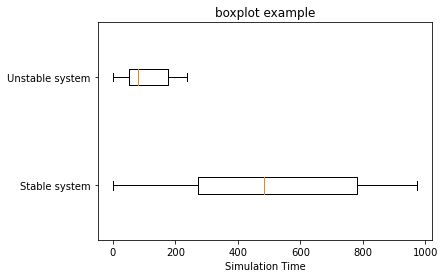

In [56]:
a0pos = aaa[0]['Time'].to_numpy()[np.where(aaa[0]['Server1 Queue']==0)[0]]
b0pos = bbb[0]['Time'].to_numpy()[np.where(bbb[0]['Server1 Queue']==0)[0]]
data = [a0pos, b0pos]
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)
ax.set_yticklabels(['Stable system', 'Unstable system'])
ax.set_xlabel('Simulation Time')
ax.set_title('boxplot example')
plt.show()

How long is long?

In [395]:
s1d = 39
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,policy="jsq1")
#bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=6000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=2000,simuseed=s1d)

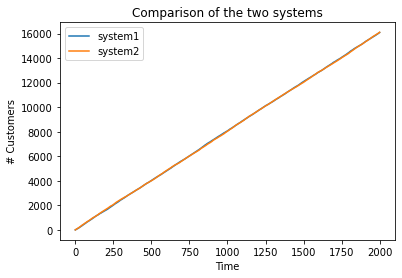

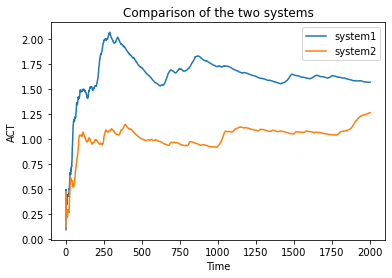

In [396]:
system_compare(aaa,ccc)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [374]:
stats.ttest_rel(data['How long is long? (2000)-homo'], data['How long is long? (4000)-homo'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [391]:
def yyy(system1):
    
    bbb = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()

    plt.plot(bbb['Time'],sys1_timing['cma'],label='jsq1')
    #plt.title('Warm up period')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()

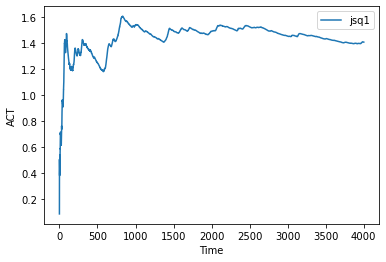

In [392]:
yyy(aaa)

Stability Analysis

In [ ]:
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)

Homo

In [594]:
s1d = 8
aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,2),2,simulation_time=2000,simuseed=s1d)

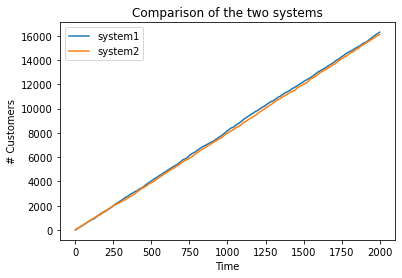

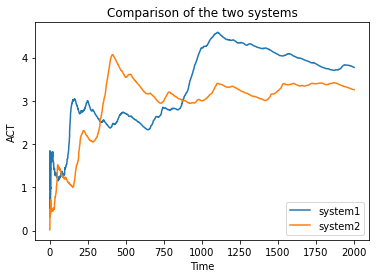

In [595]:
system_compare(aaa,bbb)

In [596]:
aaa[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.032137,0.032137,1.003115,2.0,0.970978,0.970978
2,2.0,0.441882,0.441882,3.161222,1.0,2.719339,1.845159
3,3.0,0.468704,0.468704,1.409008,3.0,0.940303,1.543540
4,4.0,0.479834,0.479834,0.610019,4.0,0.130185,1.190201
5,5.0,0.688259,0.688259,0.704209,4.0,0.015950,0.955351
...,...,...,...,...,...,...,...
16302,16302.0,1998.987648,1999.267141,1999.737373,1.0,0.749725,3.775372
16303,16303.0,1999.009818,1999.351026,1999.622122,4.0,0.612305,3.775178
16304,16304.0,1999.081144,1999.737373,1999.815213,1.0,0.734069,3.774992
16305,16305.0,1999.100738,1999.815213,1999.818758,1.0,0.718019,3.774804


In [597]:
bbb[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.032137,0.032137,0.049162,2.0,0.017025,0.017025
2,2.0,0.441882,0.441882,0.457832,4.0,0.015950,0.016488
3,3.0,0.468704,0.468704,0.948329,3.0,0.479624,0.170866
4,4.0,0.479834,0.479834,0.576104,4.0,0.096271,0.152218
5,5.0,0.688259,0.688259,1.020503,2.0,0.332244,0.188223
...,...,...,...,...,...,...,...
16115,16115.0,1997.395727,1998.550057,1998.818819,3.0,1.423093,3.260895
16116,16116.0,1997.429154,1998.593213,1999.664952,1.0,2.235798,3.260831
16117,16117.0,1997.665240,1998.718968,1999.269381,4.0,1.604141,3.260728
16118,16118.0,1997.705377,1998.818819,1998.898998,3.0,1.193622,3.260600
